In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cleaned_data.csv', index_col=0)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledTime,Sched_to_App_Time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,15:38:08,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,13:08:27,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,13:19:04,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,14:29:31,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,13:07:23,0


In [4]:
# Convert the 'no-shows' to a 1 for 'yes' and a 0 for 'no' so we can compare variables 

df['No-show'] = df['No-show'].apply(lambda x: 0 if x == 'No' else 1)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sched_to_App_Time
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


In [6]:
# From the describe, it looks like we have a min age of -1 and appointments that 
# were scheduled many days after they took place - let's see what happens if we 
# get rid of these values. Also, the values for 'Handcap' should only be 0 or 1

df = df[df['Age'] > 0]
df = df[df['Sched_to_App_Time'] >= 0]
df['Handcap'] = df['Handcap'].apply(lambda x: 0 if x == 0 else 1)

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime', 'Sched_to_App_Time'],
      dtype='object')

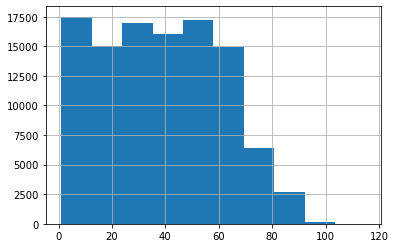

In [8]:
# let's plot some histograms to get a sense of the distribution of our data

df.Age.hist()

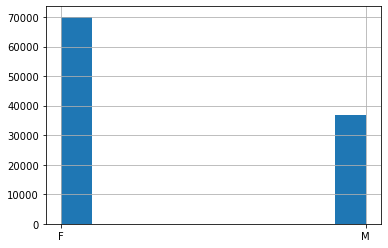

In [9]:
df.Gender.hist()

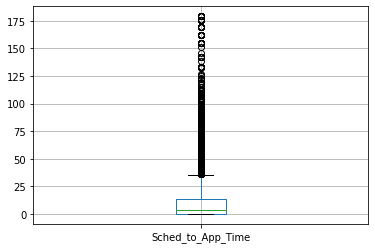

In [10]:
df.boxplot(column='Sched_to_App_Time')

In [11]:
# Looks like the majority of our appointments are scheduled within a month
# of the day of the appointment, though there are many outliers we should be 
# mindful of. Let's look at the correlation between some variables 

df[['No-show','Sched_to_App_Time','Age','Scholarship']].corr()

,No-show,Sched_to_App_Time,Age,Scholarship
No-show,1.000000,0.185797,-0.067013,0.029404
Sched_to_App_Time,0.185797,1.000000,0.038880,-0.030452
Age,-0.067013,0.038880,1.000000,-0.112707
Scholarship,0.029404,-0.030452,-0.112707,1.000000


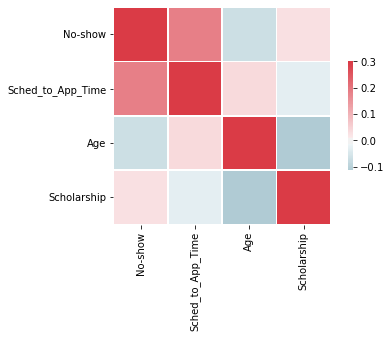

In [12]:
# If we put this into a heat map, we can see the correlation more clearly. 

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['No-show','Sched_to_App_Time','Age','Scholarship']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

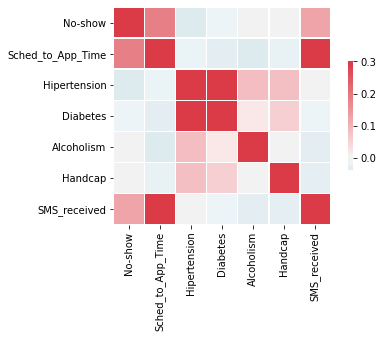

In [13]:
# Looks like there's some correlation between no-shows and the time that elapses 
# between initial scheduling and the appointment date. Let's see if any conditions,
# either economic or medical, lead to no-shows - and let's keep 'Sched_to_App_Time' 
# as a benchmark. 

sns.heatmap(df[['No-show','Sched_to_App_Time','Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# Next, let's use some bar charts to look at the categorical variables 
# in this dataset (We will look at Neighbourhoods separately because of size)

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime', 'Sched_to_App_Time'],
      dtype='object')

graph for Gender: total = 2


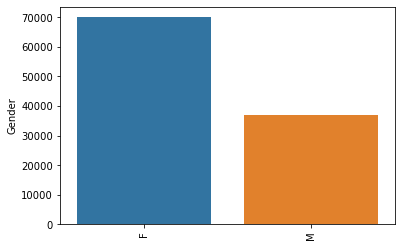

graph for Scholarship: total = 2


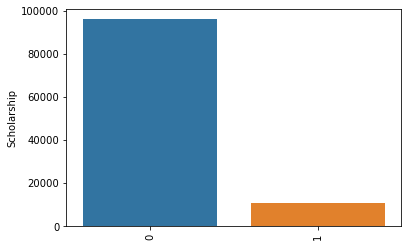

graph for Hipertension: total = 2


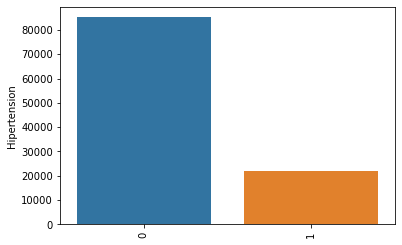

graph for Diabetes: total = 2


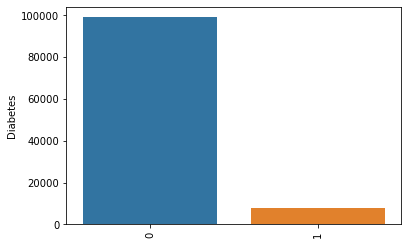

graph for Alcoholism: total = 2


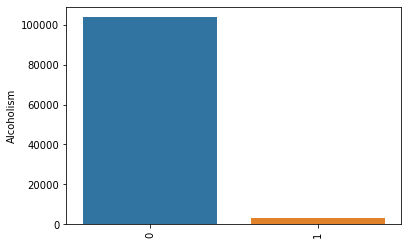

graph for SMS_received: total = 2


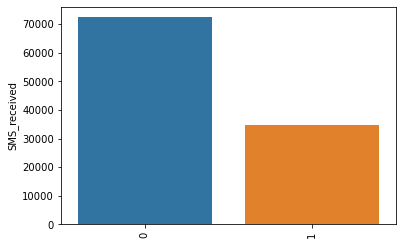

graph for Handcap: total = 2


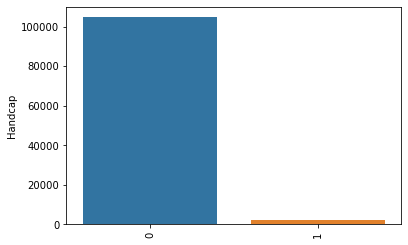

graph for No-show: total = 2


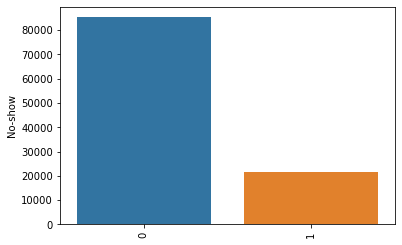

In [15]:
df_cat = df[['Gender', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'SMS_received', 'Handcap','No-show']]


for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

JARDIM CAMBURI       7586
MARIA ORTIZ          5563
RESISTÊNCIA          4234
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3018
JESUS DE NAZARETH    2719
BONFIM               2700
SANTO ANTÔNIO        2671
CARATOÍRA            2489
SANTO ANDRÉ          2458
JABOUR               2396
SÃO PEDRO            2346
ILHA DO PRÍNCIPE     2222
ANDORINHAS           2195
DA PENHA             2155
NOVA PALESTINA       2147
ROMÃO                2126
Name: Neighbourhood, dtype: int64
Graph for Neighbourhoods: total = 20


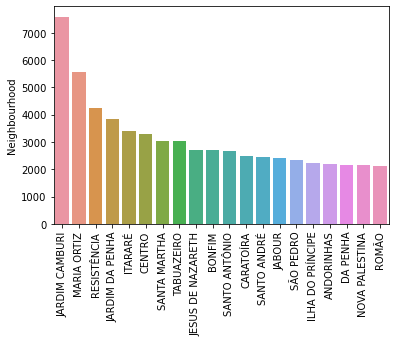

In [5]:
cat_num = df['Neighbourhood'].value_counts()[:20]
print(cat_num)
print("Graph for Neighbourhoods: total = %d" % (len(cat_num)))
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [17]:
# And now let's have a look at the data through crosstabs

pd.crosstab(df['Gender'], df['No-show'], normalize=True)

No-show,0,1
Gender,,
F,0.521985,0.133406
M,0.275411,0.069199


In [18]:
pd.crosstab(df['Neighbourhood'], df['No-show'])

No-show,0,1
Neighbourhood,,
AEROPORTO,7,1
ANDORINHAS,1686,509
ANTÔNIO HONÓRIO,212,45
ARIOVALDO FAVALESSA,207,61
BARRO VERMELHO,327,91
...,...,...
SÃO JOSÉ,1461,407
SÃO PEDRO,1849,497
TABUAZEIRO,2467,551


In [19]:
# Looks like women are overrepresented in both the no-show and show columns,
# but given that there are double the number of women to men in the dataset, 
# this tells is that the rates of both showing up and no-showing are the same 
# across genders.
